<a href="https://colab.research.google.com/github/HJKQWE/EDA_project/blob/main/Project_1_EDA_%D0%93%D1%83%D1%80%D0%BE%D0%B2%D0%B0_%D0%AE%D0%BB%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline 

# Визуальный анализ рейтингов шоу Netflix
<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  



### Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA.
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный в числом.
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user_rating_size` - общий рейтинг пользователей.

## Требования к групповому проекту

В качестве результата ваша группа должна получить презентацию и защитить ее на дополнительном занятии.  
Ссылка на шаблон к презентации: лежит рядом с заданием в классруме.  
Вы можете менять оформление презентации, но помните, что результат должен быть релевантен для демонстрации заказчику. Например, вставлять в презентацию строчки кода или злоупотреблять скринами блокнота не стоит :)

Помимо презентации, каждому из участников проекта нужно будет сдать свой notebook c решением на проверку. Наши ассистенты проверять ваш код, визуализацию и выводы. 

### Вопросы, на которые нужно ответить в презентации: 
- Сколько рейтинговых групп представлено в данных?
- Какие оценки пользователи ставят чаще всего?
- Какие оценки пользователи ставят в среднем?
- В какие годы были запущены шоу?
- Можно ли сделать вывод, что 2017 год успешнее для Netflix?
- В каких рейтинговых группах запущены шоу на Netflix?
- Выберите любое шоу (например, самое понравившееся) и составьте его описательный портрет. На какие вопросы о нем вам было бы интересно ответить, если бы вы были заказчиком? Ответьте на эти вопросы :) 

Вопросы ниже помогут вам ответить на вопросы из презентации и сопроводить выводы релевантной визуализацией. 

Любой хороший Data Scientist должен уметь работать в команде, поэтому распределение ваших усилий в проекте остается за вами. Как пример, вы можете распределить вопросы/слайды между собой.

### Полезные замечания и советы
- Следите за тем, чтобы все графики на слайдах можно было прочитать даже без ваших комментариев;
- Не нужно делать просто текстовые слайды;
- Не обязательно ограничиваться представленным датасетом. У вас есть весь интернет, чтобы найти дополнительную информацию и проверить ваши гипотезы. Дерзайте!


## Решение

Скачайте данные: они лежат рядом с этим файлом в классруме. 
Загрузите данные, выполнив код ниже.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NetflixShows - NetflixShows.csv to NetflixShows - NetflixShows.csv


In [ ]:
data = pd.read_csv(r"NetflixShows - NetflixShows.csv", encoding='cp437')
del data['ratingDescription'], data['user rating size']

In [ ]:
# Проверим верно ли считался датасет
data

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",2016,97.0
996,The Secret Life of Pets,PG,for action and some rude humor,2016,NaN
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN
998,Beary Tales,TV-G,Suitable for all ages.,2013,NaN


In [ ]:
data.info() # Ознакомление с основными данными ДатаФрейма
# Есть пропуски в данных. Больше всего пропусков (40%) в столбце user rating score

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1000 non-null   object 
 1   rating             1000 non-null   object 
 2   ratingLevel        941 non-null    object 
 3   release year       1000 non-null   int64  
 4   user rating score  605 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


In [ ]:
data.isna().sum() # определим количество пропусков в каждом столбце

title                  0
rating                 0
ratingLevel           59
release year           0
user rating score    395
dtype: int64

In [ ]:
data = data.replace({'NA': np.nan}) # заменим пропуски на значение NaN

In [ ]:
# Проверим получилось ли заполнить пропуски. Пропуски важно заполнять, если предполагается, что будет обучаться модель на этих данных.
# Но заданием не оговорено надо ли их заполнять или не надо.
data

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",2016,97.0
996,The Secret Life of Pets,PG,for action and some rude humor,2016,NaN
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN
998,Beary Tales,TV-G,Suitable for all ages.,2013,NaN


In [ ]:
# Пример заполнения нулями
#data['user rating score'].fillna(0, inplace = True)

In [ ]:

data.head(30)

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,95.0
6,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,2013,97.0
7,The Vampire Diaries,TV-14,Parents strongly cautioned. May be unsuitable ...,2017,91.0
8,The Walking Dead,TV-MA,For mature audiences. May not be suitable for...,2015,98.0
9,Pretty Little Liars,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,96.0


In [ ]:
# Заменим пропуски в рейтинге на OUT OF RATING LEVEL. Возможен вариант найти моду для каждого рейтинга и заполнить пропуски согласно моде (код будет дальше представлен).
# Также, можно вручную отработать каждый пропуск: найти в свободных источниках информацию о рейтинговой группе каждого шоу, 
# но это очень трудоемкий процесс (59 пропущенных значений).
data['ratingLevel'].fillna('OUT OF RATING LEVEL', inplace = True)

In [ ]:
# Проверим что получилось
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1000 non-null   object 
 1   rating             1000 non-null   object 
 2   ratingLevel        1000 non-null   object 
 3   release year       1000 non-null   int64  
 4   user rating score  605 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


In [ ]:
data.head(30)

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,95.0
6,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,2013,97.0
7,The Vampire Diaries,TV-14,Parents strongly cautioned. May be unsuitable ...,2017,91.0
8,The Walking Dead,TV-MA,For mature audiences. May not be suitable for...,2015,98.0
9,Pretty Little Liars,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,96.0


In [ ]:
data.groupby(by = 'rating', sort = True).size() # Сгруппируем и посмотрим сколько элементов в каждой группе изначально


rating
G           138
NR           14
PG          170
PG-13        15
R            19
TV-14       234
TV-G         52
TV-MA       148
TV-PG        59
TV-Y         68
TV-Y7        38
TV-Y7-FV     44
UR            1
dtype: int64

In [ ]:
data_copy = data.copy() # для наглядности дальнейших действий по очистке данных, создадим копию ДатаФрейма
data_copy

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",2016,97.0
996,The Secret Life of Pets,PG,for action and some rude humor,2016,NaN
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN
998,Beary Tales,TV-G,Suitable for all ages.,2013,NaN


### Удалите из данных дубликаты. 
- Почему они возникли?

**Ответ:** Накопление дубликатов скорее всего возникло, потому что данные были выгружены из разных баз данных.

- Много ли их? 

**Ответ:** Из 1000 элементов исходного Датасета после очистки от дубликатов осталось 500 элементов. То есть дубликаты составили 50% исходного Датасета. Это много.

- В каких группах их больше всего?

**Ответ:** 75% дубликатов сосредоточены в группах:

**TV-14** = 128 шт (Программа TV-14 предназначена для детей старше 14 лет. Как правило, не рекомендуется разрешать детям смотреть программу без участия родителей или, по крайней мере, без их предварительной проверки. Это может содержать грубый юмор, использование вредных веществ, сильный язык, насилие и сложные или расстраивающие темы).

**PG** = 94 шт (Этот контент может быть неподходящим для детей младшего возраста. Родители или опекуны должны сначала изучить программу и принять решение об этом. Это может включать в себя некоторые внушающие или неуместные выражения, умеренное насилие и даже немного сексуального содержания).

**G** = 85 шт (Это самый низкий возрастной рейтинг и означает он "возрастные ограничения отсутствуют". Это метка означает, что данный материал не может принести какой либо вред для детской психики. Чаще всего данный рейтинг присваивается самым обычным семейным мультфильмам и комедиям).

**TV-MA** = 66 шт (это рейтинг, который показывает, что программа предназначена для взрослых. «МА» означает «зрелая аудитория». Дети в возрасте до 17 лет не должны смотреть эти программы).

Фактически, в этих группах больше всего шоу, эти группы самые распространенные.

In [ ]:
# При исследовании вопроса с дубликатами выяснился интересный момент.
# Если выполнять удаление дубликатов только по слобцу title
# data.drop_duplicates(subset=['title'], keep='first', inplace = True)
# То получается 496 элементов, а если удалять по полному соответствию, 
# data.drop_duplicates(keep='first', inplace = True)
# то получается 500 элементов.
# При проведении исследования этих элемнтов оказалось, что некоторые шоу имеют одно название, но это разные продукты. Код приведен ниже.
data.drop_duplicates(keep='first', inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 998
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              500 non-null    object 
 1   rating             500 non-null    object 
 2   ratingLevel        500 non-null    object 
 3   release year       500 non-null    int64  
 4   user rating score  256 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 23.4+ KB


In [ ]:
# 496 одинаковых названий, но 500 элементов
data['title'].value_counts()

Bordertown                   2
Skins                        2
Goosebumps                   2
Star Wars: The Clone Wars    2
White Chicks                 1
                            ..
One Day at a Time            1
The Magicians                1
The Great Gilly Hopkins      1
Fried                        1
Beary Tales                  1
Name: title, Length: 496, dtype: int64

In [ ]:
# Один из них фильм, второй мультсериал.
data.loc[data['title'] == 'Star Wars: The Clone Wars']

,title,rating,ratingLevel,release year,user rating score
504,Star Wars: The Clone Wars,PG,"sci-fi action violence throughout, brief langu...",2008,57.0
512,Star Wars: The Clone Wars,TV-PG,Parental guidance suggested. May not be suitab...,2014,93.0


In [ ]:
# 1998 год это сериал, 2015 - фильм
data.loc[data['title'] == 'Goosebumps']

,title,rating,ratingLevel,release year,user rating score
568,Goosebumps,TV-Y7,Suitable for children ages 7 and older,1998,88.0
632,Goosebumps,PG,"scary and intense creature action and images, ...",2015,90.0


In [ ]:
# Здесь достоверно не ясно в чем различие, но они относятся к разным рейтингам и рейтинговым группам. Возможно, разные сезоны одного сериала.
data.loc[data['title'] == 'Bordertown']

,title,rating,ratingLevel,release year,user rating score
167,Bordertown,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,86.0
449,Bordertown,TV-MA,For mature audiences. May not be suitable for...,2016,NaN


In [ ]:
# 2013 - это сериал (2007-2013) про подростков, а 2017 - испанский фильм ужасов.
data.loc[data['title'] == 'Skins']

,title,rating,ratingLevel,release year,user rating score
151,Skins,TV-MA,For mature audiences. May not be suitable for...,2013,NaN
181,Skins,TV-MA,OUT OF RATING LEVEL,2017,NaN


In [ ]:
'''
После удаления дубликатов осталось всего 500 оригинальных строк.
Такое скорее всего возникло, потому что данные были выгружены из разных баз данных
'''

In [ ]:
data.describe()

,release year,user rating score
count,500.000000,256.000000
mean,2010.976000,81.398438
std,7.829305,12.730904
min,1940.000000,55.000000
25%,2009.000000,71.000000
50%,2014.000000,83.500000
75%,2016.000000,93.000000
max,2017.000000,99.000000


In [ ]:
f = data.groupby(by = 'rating', sort = True).size() # Сгруппируем и посмотрим сколько элементов в каждой группе после удаления дубликатов
f = f.sort_values(ascending=False)
f

rating
TV-14       106
TV-MA        82
PG           76
G            53
TV-Y         36
TV-PG        33
TV-G         29
TV-Y7-FV     25
TV-Y7        23
R            14
PG-13        12
NR           10
UR            1
dtype: int64

In [ ]:
g = data_copy.groupby(by = 'rating', sort = True).size() # Для сравнения копия исходного датасета
g = g.sort_values(ascending=False)
g

rating
TV-14       234
PG          170
TV-MA       148
G           138
TV-Y         68
TV-PG        59
TV-G         52
TV-Y7-FV     44
TV-Y7        38
R            19
PG-13        15
NR           14
UR            1
dtype: int64

In [ ]:
# Количество удаленных дубликатов в каждом рейтинге
count_of_dropped_duplicates = g-f
count_of_dropped_duplicates_sorted = count_of_dropped_duplicates.sort_values(ascending=False) # отсортируем для наглядности
count_of_dropped_duplicates_sorted

rating
TV-14       128
PG           94
G            85
TV-MA        66
TV-Y         32
TV-PG        26
TV-G         23
TV-Y7-FV     19
TV-Y7        15
R             5
NR            4
PG-13         3
UR            0
dtype: int64

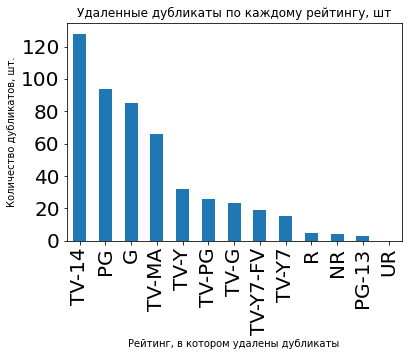

In [ ]:

count_of_dropped_duplicates_sorted.plot(kind="bar", 
                                 fontsize=20, 
                                 xlabel = 'Рейтинг, в котором удалены дубликаты', 
                                 ylabel = 'Количество дубликатов, шт.', 
                                 title = 'Удаленные дубликаты по каждому рейтингу, шт')



Text(0.5, 1.0, 'Соотношение исходного количества элементов к очищенному от дубликатов, рейтинг/шт.')

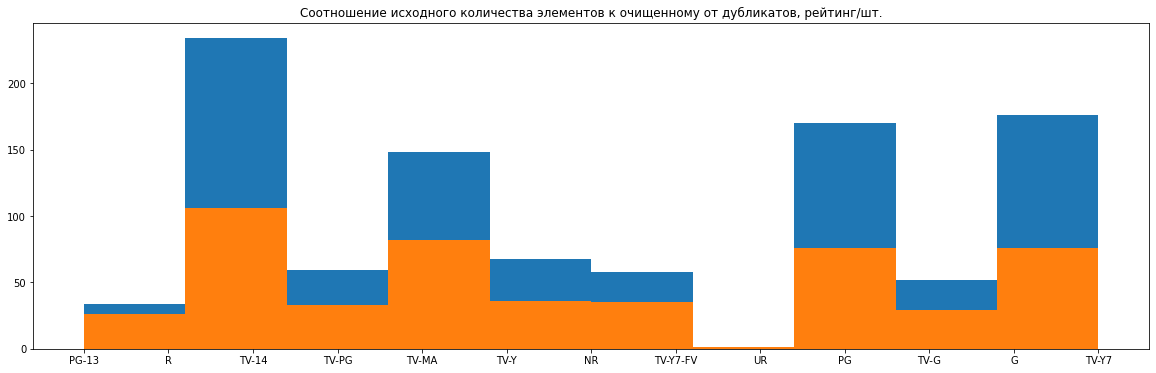

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.hist(data_copy['rating'])
ax.hist(data['rating'])
plt.title(label = 'Соотношение исходного количества элементов к очищенному от дубликатов, рейтинг/шт.')

In [ ]:
'''
Больше всего дубликатов в группах:
TV-14 = 128
PG = 94
G = 85
TV-MA = 66
'''

### Сколько рейтинговых групп представлено в данных?

**Ответ:** представлено 100 рейтинговых групп.

### Какие оценки пользователи ставят чаще? 

**Ответ:**

91 оценка находится в диапазоне свыше 90 баллов. Почти треть из оцененных шоу, оценены зрителями превосходно.
Всего 256 оценок проставлено. Это чуть больше половины от всего Датасета.
Средняя оценка 81.39 баллов.
Медианная оценка 83.5 баллов, половина оценок выше 83.5 баллов и до максимальной 99 баллов.
При этом, четверть оценок находятся в пределах от 55 до 71 баллов.
- Почему именно такие оценки ставят чаще всего?

**Ответ:**
На мой взгляд, если учесть количество проставленных оценок и количество шоу без оценок, то можно предположить, что зрители пытаются сформировать у рекомендательных систем он-лайн кинотеатров рекомендации, "заточенные" под конкретного зрителя. Например, если шоу действительно понравилось зрителю, то он не поленится поставить оценку и ответить на пару вопросов что именно понравилось. Если же, шоу не произвело особого впечатления, то зритель скорее всего не поставит ничего. Если же речь идет о низких оценках, то тут зритель так же выражает свое мнение, чтобы рекомендательная система более не предлагала подобного контента.

**Дополнительные выводы раздела:**

В столбце rating представлено 13 рейтингов. Из них есть схожие по смыслу

**TV-PG** и **PG** - Parental guidance suggested.

**TV-G** и **G** - General Audiences. Suitable for all ages.

Если объеденить эти группы, то получится 11 рейтингов.

**Самое высокорейтинговое шоу:**
"13 Reasons Why" с рейтингом TV-MA (For mature audiences.  May not be suitable for children 17 and under.), год выпуска 2017, с оценкой зрителей 99.0 баллов.

В диапазоне **свыше 90 баллов** **находятся следующие рейтинги:**

**TV-14** Программа TV-14 предназначена для детей старше 14 лет. 

**PG**  Этот контент может быть неподходящим для детей младшего возраста. 

**TV-PG** Этот контент может быть неподходящим для детей младшего возраста. 

**TV-MA** это рейтинг, который показывает, что программа предназначена для взрослых. «МА» означает «зрелая аудитория». Дети в возрасте до 17 лет не должны смотреть эти программы.

В диапазоне **ниже 60 баллов** находятся в основном шоу, подходящие **для всех возрастов.**
Таким образом распределились **средние оценки внутри рейтингов**:

**R**_______ 85.3

**TV-MA**___84.8

**PG**__84.1

**TV-PG**__83.8

**TV-14**__82.9

**NR**__77.0

**TV-Y7**__76.5

**TV-Y**__75.0

**G**__74.4

**TV-G**__74.4

**TV-Y7-FV**__72.7

**PG-13**__71.4

In [ ]:
print('Представлено групп в ratingLevel:', len(data.groupby( by = 'ratingLevel', sort = True).size())) # количесвто групп, которые представленны

Представлено групп в ratingLevel: 100


In [ ]:
# Самые популярные рейтинговые группы
most_popular_ratingLevel = []

for i in f.index:   # Пройдемся перебором по индексам в очищенном от дублей датасете f = data.groupby(by = 'rating', sort = True).size()
    data_i = data.where(data['rating'] == i) # создаем новый датафрейм, где записываемое значение такое же как текущее i. Пример : новый датафрейм где rating == 'G'
    max_val = (data_i["ratingLevel"].value_counts()).sort_index() # сохраним в список количество встреченных значений
    most_popular_ratingLevel.append(max_val.index[max_val.values == max_val.max()][0]) # получаем максимальное число событий и добавляем его в список
    
most_popular_ratingLevel_df = pd.DataFrame({'rating': f.index, 'Max_found_Level': most_popular_ratingLevel}) #создадим новый фрейм с максимальными количествами
print('Самые частые рейтинговые группы в каждом рейтинге') 
most_popular_ratingLevel_df

Самые частые рейтинговые группы в каждом рейтинге


,rating,Max_found_Level
0,TV-14,Parents strongly cautioned. May be unsuitable ...
1,TV-MA,For mature audiences. May not be suitable for...
2,PG,Parental guidance suggested. May not be suitab...
3,G,General Audiences. Suitable for all ages.
4,TV-Y,Suitable for all ages.
5,TV-PG,Parental guidance suggested. May not be suitab...
6,TV-G,Suitable for all ages.
7,TV-Y7-FV,Suitable for children ages 7 and older. Conte...
8,TV-Y7,Suitable for children ages 7 and older
9,R,Restricted. May be inappropriate for children ...


In [ ]:
# код для заполнения пропусков самыми частыми значениями в рейтинге.
'''
for i in range(len(f.index)):
    if 'OUT OF RATING LEVEL' in data['ratingLevel'][i]:
        rating = data['rating'][i]
        description = most_popular_ratingLevel_df.loc[most_popular_ratingLevel_df['rating'] == rating, 'Max_found_Level'].values[0]
        data['ratingLevel'][i] = description
        '''

In [ ]:
data_i.head(50)

,title,rating,ratingLevel,release year,user rating score
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Изучим распределение оценок внутри каждой группы в разрезе по каждому шоу
data_pivot_table = data.pivot_table(values=['user rating score'], index=['rating','ratingLevel', 'title'], aggfunc= 'max')
data_pivot_table.sort_values(by = 'user rating score', ascending = False).head(91)
 

,,,user rating score
rating,ratingLevel,title,
TV-MA,For mature audiences. May not be suitable for children 17 and under.,13 Reasons Why,99.0
TV-PG,Parental guidance suggested. May not be suitable for all children.,The Flash,98.0
TV-14,Parents strongly cautioned. May be unsuitable for children ages 14 and under.,Friends,98.0
TV-MA,For mature audiences. May not be suitable for children 17 and under.,Family Guy,98.0
PG,mild thematic elements,Finding Dory,98.0
...,...,...,...
TV-14,Parents strongly cautioned. May be unsuitable for children ages 14 and under.,Stranger Things,90.0
PG,"scary and intense creature action and images, and for some rude humor",Goosebumps,90.0
TV-PG,Parental guidance suggested. May not be suitable for all children.,Charmed,90.0


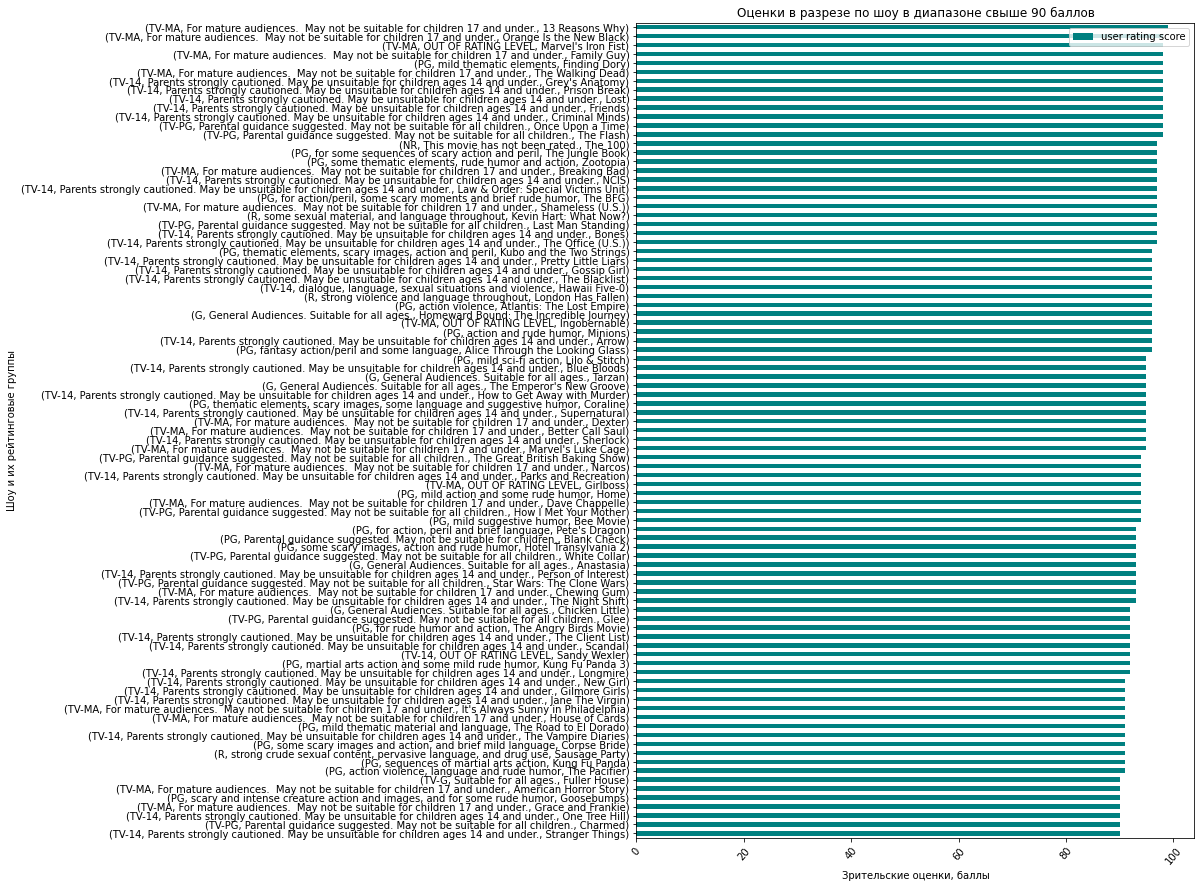

In [ ]:

data_pivot_table[data_pivot_table['user rating score'] >= 90].sort_values(by = 'user rating score', ascending = True).plot.barh(color='teal', figsize=(10, 15))
plt.xticks(rotation=50)
plt.xlabel("Зрительские оценки, баллы")
plt.ylabel("Шоу и их рейтинговые группы")
plt.title("Оценки в разрезе по шоу в диапазоне свыше 90 баллов")
plt.show()
plt.close()


<ipython-input-171-636aee838a6e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_pivot_table[data_pivot_table['user rating score'] >= 80][data_pivot_table['user rating score'] < 90].sort_values(by = 'user rating score', ascending = True).plot.barh(color='Salmon', figsize=(10, 15))


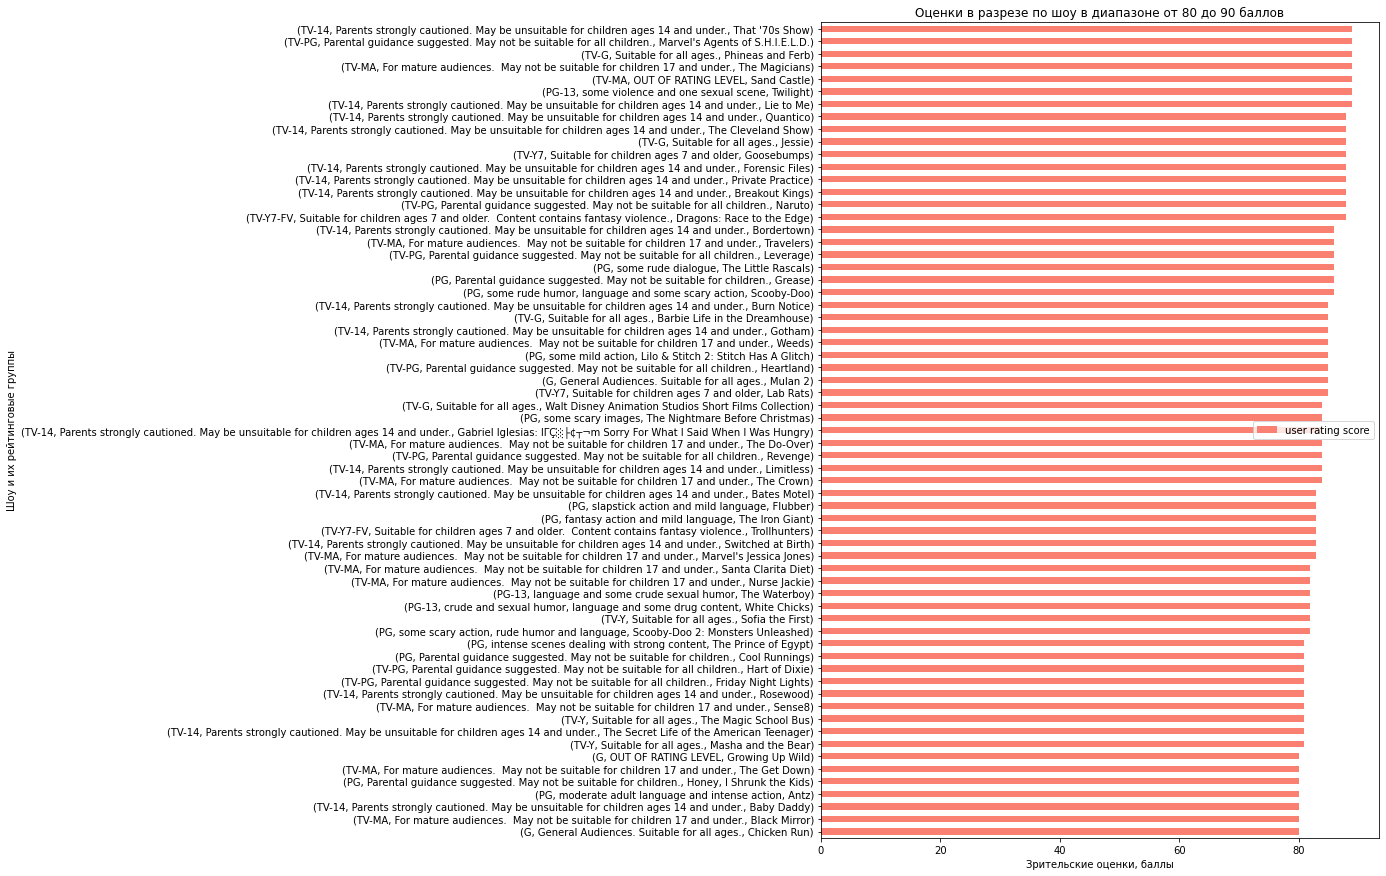

In [ ]:
data_pivot_table[data_pivot_table['user rating score'] >= 80][data_pivot_table['user rating score'] < 90].sort_values(by = 'user rating score', ascending = True).plot.barh(color='Salmon', figsize=(10, 15))
plt.xlabel("Зрительские оценки, баллы")
plt.ylabel("Шоу и их рейтинговые группы")
plt.title("Оценки в разрезе по шоу в диапазоне от 80 до 90 баллов")
plt.show()
plt.close()

<ipython-input-153-db193f8e2231>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_pivot_table[data_pivot_table['user rating score'] >= 70][data_pivot_table['user rating score'] < 80].sort_values(by = 'user rating score', ascending = True).plot.barh(color='mediumseagreen', figsize=(10, 15))


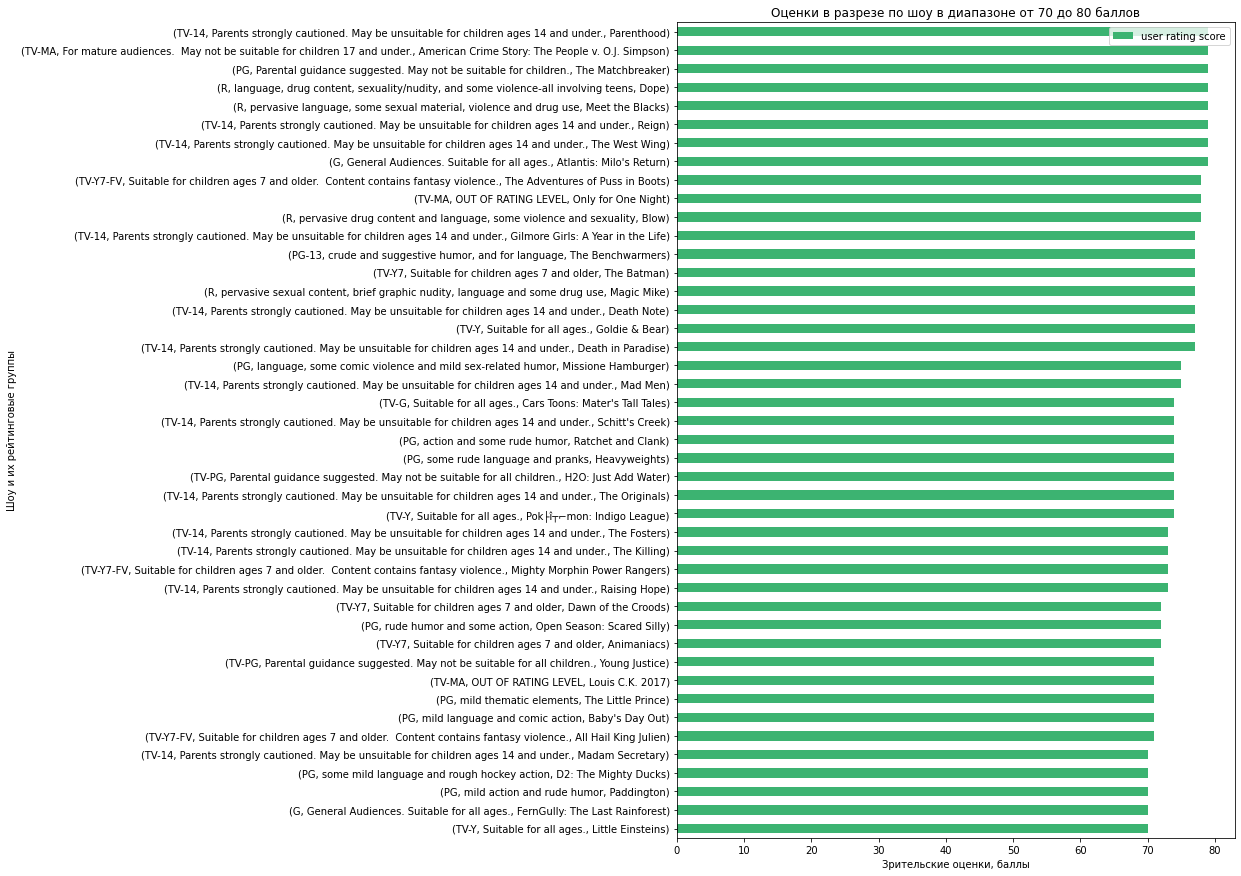

In [ ]:
data_pivot_table[data_pivot_table['user rating score'] >= 70][data_pivot_table['user rating score'] < 80].sort_values(by = 'user rating score', ascending = True).plot.barh(color='mediumseagreen', figsize=(10, 15))
plt.xlabel("Зрительские оценки, баллы")
plt.ylabel("Шоу и их рейтинговые группы")
plt.title("Оценки в разрезе по шоу в диапазоне от 70 до 80 баллов")
plt.show()
plt.close()

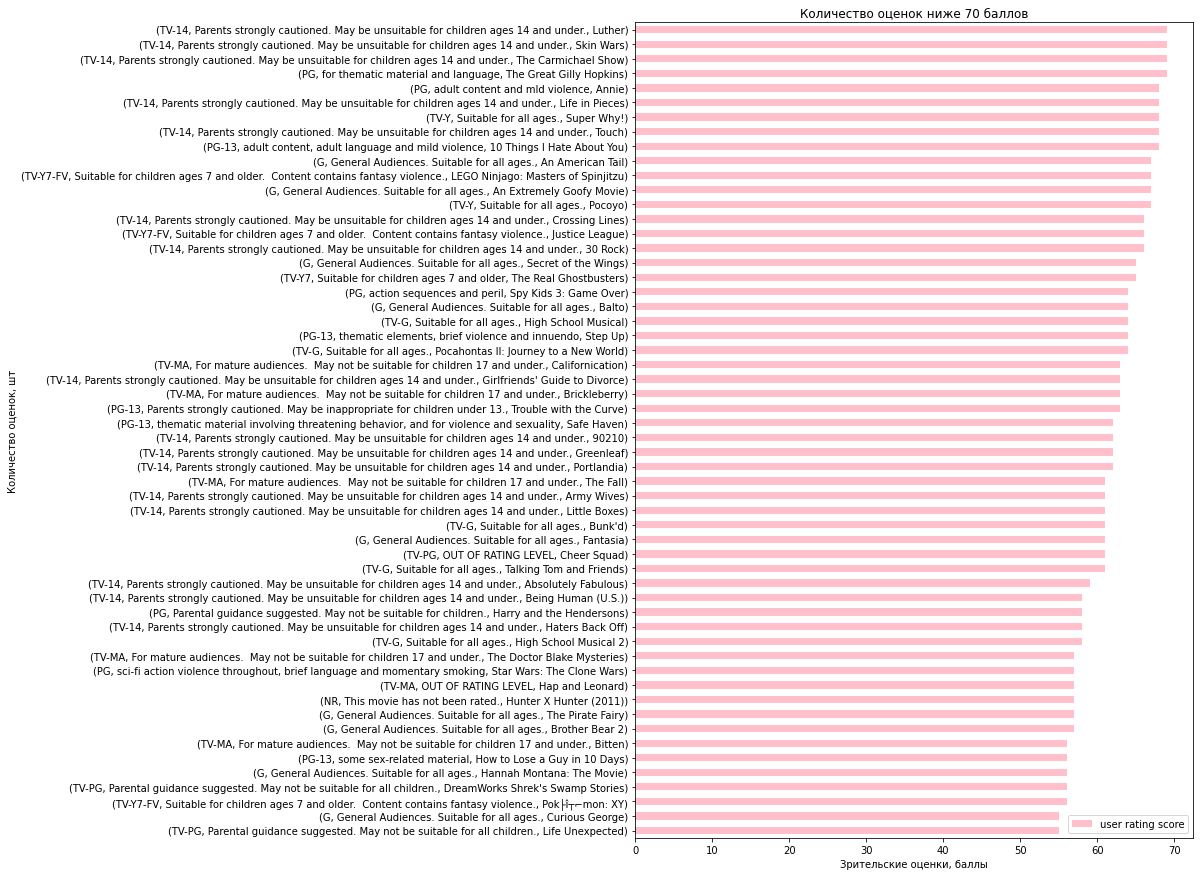

In [ ]:
data_pivot_table[data_pivot_table['user rating score'] < 70].sort_values(by = 'user rating score', ascending = True).plot.barh(color='pink', figsize=(10, 15)) # value_counts().
plt.xlabel("Зрительские оценки, баллы")
plt.ylabel("Количество оценок, шт")
plt.title("Количество оценок ниже 70 баллов")
plt.show()
plt.close()

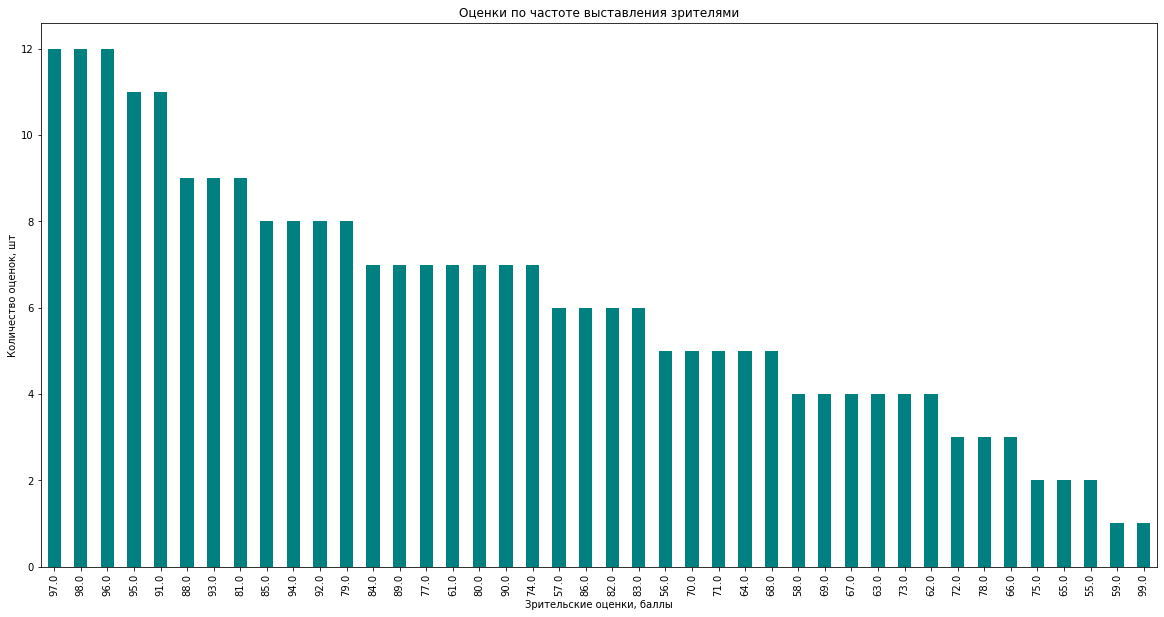

In [ ]:
data_pivot_table['user rating score'].value_counts().sort_values(ascending = False).plot.bar(color='teal', figsize=(20, 10))
plt.xlabel("Зрительские оценки, баллы")
plt.ylabel("Количество оценок, шт")
plt.title("Оценки по частоте выставления зрителями")
plt.show()
plt.close()

In [ ]:
scores_up_90 = data_pivot_table[data_pivot_table['user rating score'] >= 90].value_counts().sort_values(ascending = False)
scores_80_90 = data_pivot_table[data_pivot_table['user rating score'] >= 80][data_pivot_table['user rating score'] < 90].value_counts().sort_values(ascending = False)
scores_70_80 = data_pivot_table[data_pivot_table['user rating score'] >= 70][data_pivot_table['user rating score'] < 80].value_counts().sort_values(ascending = False)
scores_to_70 = data_pivot_table[data_pivot_table['user rating score'] < 70].value_counts().sort_values(ascending = False)
print(scores_up_90)
print('Суммарное количество оценок свыше 90 баллов:', scores_up_90.sum())
print(scores_80_90)
print('Суммарное количество оценок 80_90 баллов:', scores_80_90.sum())
print(scores_70_80)
print('Суммарное количество оценок 70_80 баллов:', scores_70_80.sum())
print(scores_to_70)
print('Суммарное количество оценок ниже 70 баллов:', scores_to_70.sum())

user rating score
96.0                 12
97.0                 12
98.0                 12
91.0                 11
95.0                 11
93.0                  9
92.0                  8
94.0                  8
90.0                  7
99.0                  1
dtype: int64
Суммарное количество оценок свыше 90 баллов: 91
user rating score
81.0                 9
88.0                 9
85.0                 8
80.0                 7
84.0                 7
89.0                 7
82.0                 6
83.0                 6
86.0                 6
dtype: int64
Суммарное количество оценок 80_90 баллов: 65
user rating score
79.0                 8
74.0                 7
77.0                 7
70.0                 5
71.0                 5
73.0                 4
72.0                 3
78.0                 3
75.0                 2
dtype: int64
Суммарное количество оценок 70_80 баллов: 44
user rating score
61.0                 7
57.0                 6
56.0                 5
64.0                 5
68.0 

<ipython-input-165-9080e5e2407c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  scores_80_90 = data_pivot_table[data_pivot_table['user rating score'] >= 80][data_pivot_table['user rating score'] < 90].value_counts().sort_values(ascending = False)
<ipython-input-165-9080e5e2407c>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  scores_70_80 = data_pivot_table[data_pivot_table['user rating score'] >= 70][data_pivot_table['user rating score'] < 80].value_counts().sort_values(ascending = False)


In [ ]:
data[data['user rating score']>=90].value_counts().head(50) # Посмотрим какие самые высокорейтинговые фильмы и категории присутствуют в Датасете

title                              rating  ratingLevel                                                                    release year  user rating score
13 Reasons Why                     TV-MA   For mature audiences.  May not be suitable for children 17 and under.          2017          99.0                 1
Shameless (U.S.)                   TV-MA   For mature audiences.  May not be suitable for children 17 and under.          2016          97.0                 1
Sausage Party                      R       strong crude sexual content, pervasive language, and drug use                  2016          91.0                 1
Sandy Wexler                       TV-14   OUT OF RATING LEVEL                                                            2017          92.0                 1
Prison Break                       TV-14   Parents strongly cautioned. May be unsuitable for children ages 14 and under.  2008          98.0                 1
Pretty Little Liars                TV-14   Parents 

In [ ]:
data[data['user rating score']<60].value_counts() # Посмотрим какие самые низкорейтинговые фильмы и категории присутствуют в Датасете

title                             rating    ratingLevel                                                                    release year  user rating score
Absolutely Fabulous               TV-14     Parents strongly cautioned. May be unsuitable for children ages 14 and under.  2012          59.0                 1
Being Human (U.S.)                TV-14     Parents strongly cautioned. May be unsuitable for children ages 14 and under.  2014          58.0                 1
The Doctor Blake Mysteries        TV-MA     For mature audiences.  May not be suitable for children 17 and under.          2016          57.0                 1
Star Wars: The Clone Wars         PG        sci-fi action violence throughout, brief language and momentary smoking        2008          57.0                 1
Pok├î┬⌐mon: XY                    TV-Y7-FV  Suitable for children ages 7 and older.  Content contains fantasy violence.    2015          56.0                 1
Life Unexpected                   TV-PG     P

In [ ]:
data_pivot_table.describe()
# Если заполнить пропуски в оценках пользователей нулями, то получим следующую статистику:
# Все 100 % категорий имеют оценку
# Средняя оценка 51.24 баллов
# Медианная оценка 68 баллов, половина оценок выше 68 баллов и до максимальной 97 баллов
# больше четверти категорий не имеет оценок пользователей
# Если оставить NaN в оценках пользователей, то получается следующая статистика:
# Всего 256 категорий имеют оценку
# Средняя оценка 81.39 баллов
# Медианная оценка 83.5 баллов, половина оценок выше 83.5 баллов и до максимальной 99 баллов
# четверть оценок находятся в пределах от 55 до 71 баллов.
# Как можно заметить нули очень сильно влияют на статистику датасета.

,min,max,mean
,user rating score,user rating score,user rating score
count,256.000000,256.000000,256.000000
mean,81.398438,81.398438,81.398438
std,12.730904,12.730904,12.730904
min,55.000000,55.000000,55.000000
25%,71.000000,71.000000,71.000000
50%,83.500000,83.500000,83.500000
75%,93.000000,93.000000,93.000000
max,99.000000,99.000000,99.000000


In [ ]:
# Посмотрим какие рейтинговые группы имеют самые высокие средние оценки
data_pivot_mean= data.pivot_table(values=['user rating score'], index=['ratingLevel'], aggfunc= np.mean).sort_values(['user rating score'], ascending=False)
data_pivot_mean[data_pivot_mean['user rating score']>=90].head(50)

,user rating score
ratingLevel,
for some sequences of scary action and peril,97.0
"for action/peril, some scary moments and brief rude humor",97.0
"some thematic elements, rude humor and action",97.0
"some sexual material, and language throughout",97.0
action violence,96.0
"thematic elements, scary images, action and peril",96.0
strong violence and language throughout,96.0
fantasy action/peril and some language,96.0
"dialogue, language, sexual situations and violence",96.0


In [ ]:
# Посмотрим какие рейтинговые группы имеют самые низкие средние оценки
data_pivot_mean[data_pivot_mean['user rating score']<=70].head(50)

,user rating score
ratingLevel,
mild action and rude humor,70.0
some mild language and rough hockey action,70.0
for thematic material and language,69.0
adult content and mld violence,68.0
"adult content, adult language and mild violence",68.0
action sequences and peril,64.0
"thematic elements, brief violence and innuendo",64.0
Parents strongly cautioned. May be inappropriate for children under 13.,63.0
"thematic material involving threatening behavior, and for violence and sexuality",62.0


In [ ]:
data_pivot_mean.index

Index(['for some sequences of scary action and peril',
       'for action/peril, some scary moments and brief rude humor',
       'some thematic elements, rude humor and action',
       'some sexual material, and language throughout', 'action violence',
       'thematic elements, scary images, action and peril',
       'strong violence and language throughout',
       'fantasy action/peril and some language',
       'dialogue, language, sexual situations and violence',
       'action and rude humor',
       'thematic elements, scary images, some language and suggestive humor',
       'mild sci-fi action', 'mild suggestive humor',
       'mild action and some rude humor',
       'some scary images, action and rude humor',
       'for action, peril and brief language',
       'martial arts action and some mild rude humor',
       'for rude humor and action', 'action violence, language and rude humor',
       'sequences of martial arts action',
       'mild thematic material and language'

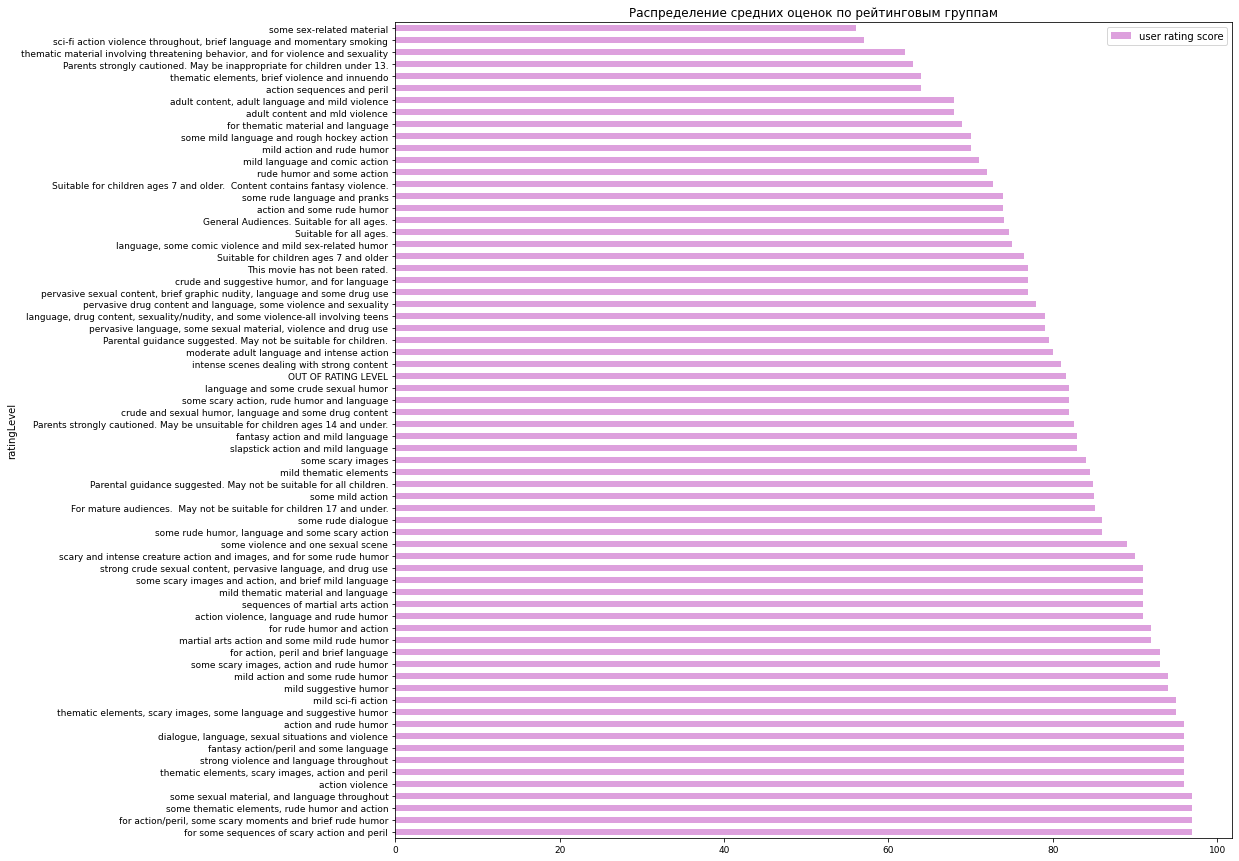

In [ ]:
data_pivot_mean.plot(kind="barh", 
                     fontsize=9, 
                     figsize=(15,15),
                     title = 'Распределение средних оценок по рейтинговым группам',
                     color = 'plum')

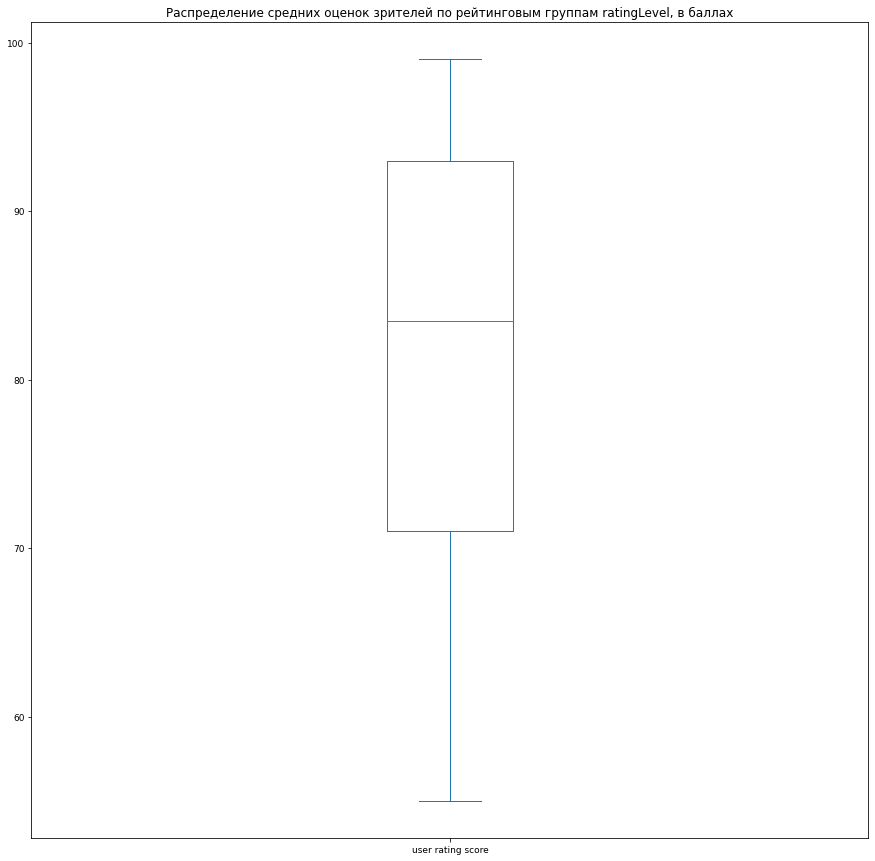

In [ ]:
data_pivot_table['mean'].plot(kind="box", 
                              fontsize=9, 
                              figsize=(15,15),
                              title = 'Распределение средних оценок зрителей по рейтинговым группам ratingLevel, в баллах')

In [ ]:
data_pivot_table_rating_mean = data.pivot_table(values=['user rating score'], index=['rating'], aggfunc= np.mean).sort_values(['user rating score'], ascending=False)
print(f'Отсортированные по убыванию средние оценки столбца rating \n\n{data_pivot_table_rating_mean}, \n\nрейтинг с самой высокой средней оценкой - это: \n\n{data_pivot_table_rating_mean.iloc[0]}')

Отсортированные по убыванию средние оценки столбца rating 

          user rating score
rating                     
R                 85.285714
TV-MA             84.825000
PG                84.104167
TV-PG             83.809524
TV-14             82.870130
NR                77.000000
TV-Y7             76.500000
TV-Y              75.000000
G                 74.421053
TV-G              74.363636
TV-Y7-FV          72.750000
PG-13             71.444444, 

рейтинг с самой высокой средней оценкой - это: 

user rating score    85.285714
Name: R, dtype: float64


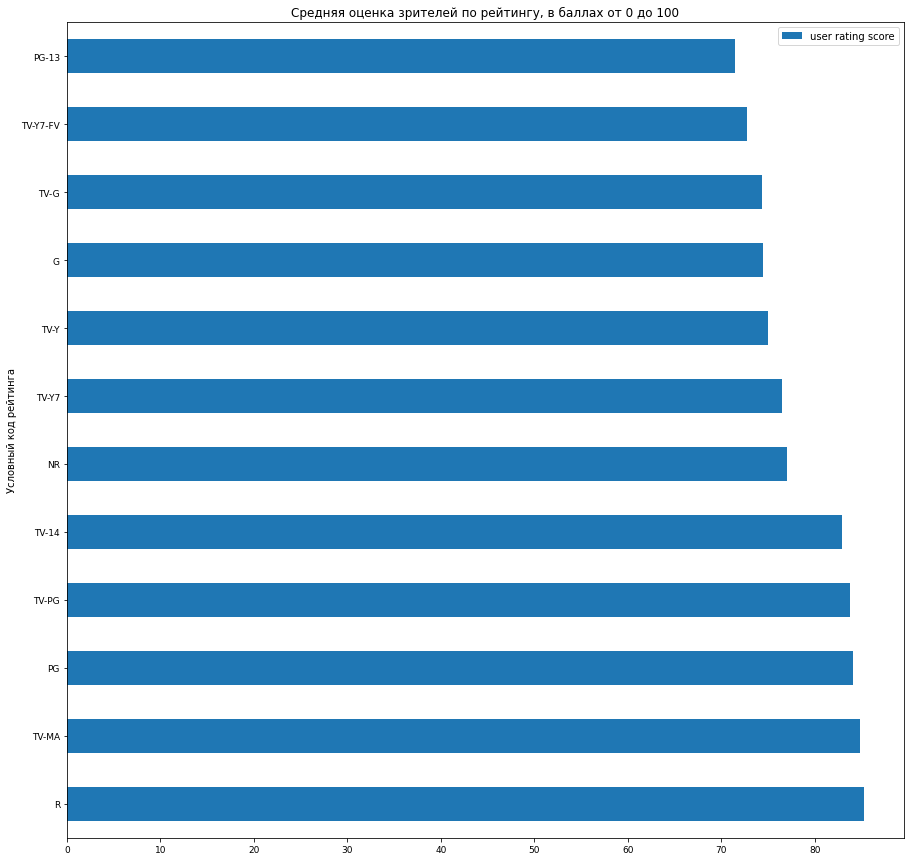

In [ ]:
data_pivot_table_rating_mean.plot(xlabel = 'Условный код рейтинга', 
                                  kind="barh", 
                                  fontsize=9, 
                                  figsize=(15,15), 
                                  title = 'Средняя оценка зрителей по рейтингу, в баллах от 0 до 100')

In [ ]:
data_pivot_table_rating_level = data.pivot_table(values=['user rating score'], index=['rating', 'ratingLevel']) #.sort_values(['rating','user rating score'], ascending=[1,1])
data_pivot_table_rating_level.head(50)

user rating score
rating ratingLevel                                                          
G      General Audiences. Suitable for all ages.                   74.111111
       OUT OF RATING LEVEL                                         80.000000
NR     This movie has not been rated.                              77.000000
PG     Parental guidance suggested. May not be suitabl...          79.500000
       action and rude humor                                       96.000000
       action and some rude humor                                  74.000000
       action sequences and peril                                  64.000000
       action violence                                             96.000000
       action violence, language and rude humor                    91.000000
       adult content and mld violence                              68.000000
       fantasy action and mild language                            83.000000
       fantasy action/peril and some language                      96.000000
       for action, peril and brief language                        93.000000
       for action/peril, some scary moments and brief ...          97.000000
       for rude humor and action                                   92.000000
       for some sequences of scary action and peril                97.000000
       for thematic material and language                          69.000000
       intense scenes dealing with strong content                  81.000000
       language, some comic violence and mild sex-rela...          75.000000
       martial arts action and some mild rude humor                92.000000
       mild action and rude humor                                  70.000000
       mild action and some rude humor                             94.000000
       mild language and comic action                              71.000000
       mild sci-fi action                                          95.000000
       mild suggestive humor                                       94.000000
       mild thematic elements                                      84.500000
       mild thematic material and language                         91.000000
       moderate adult language and intense action                  80.000000
       rude humor and some action                                  72.000000
       scary and intense creature action and images, a...          90.000000
       sci-fi action violence throughout, brief langua...          57.000000
       sequences of martial arts action                            91.000000
       slapstick action and mild language                          83.000000
       some mild action                                            85.000000
       some mild language and rough hockey action                  70.000000
       some rude dialogue                                          86.000000
       some rude humor, language and some scary action             86.000000
       some rude language and pranks                               74.000000
       some scary action, rude humor and language                  82.000000
       some scary images                                           84.000000
       some scary images and action, and brief mild la...          91.000000
       some scary images, action and rude humor                    93.000000
       some thematic elements, rude humor and action               97.000000
       thematic elements, scary images, action and peril           96.000000
       thematic elements, scary images, some language ...          95.000000
PG-13  Parents strongly cautioned. May be inappropriat...          63.000000
       adult content, adult language and mild violence             68.000000
       crude and sexual humor, language and some drug ...          82.000000
       crude and suggestive humor, and for language                77.000000
       language and some crude sexual humor                        82.000000

In [ ]:
data_pivot_table_rating_level_sorted = data_pivot_table_rating_level.sort_values(['rating', 'user rating score'], ascending= [1, 0])
data_pivot_table_rating_level_sorted.head(10)

user rating score
rating ratingLevel                                                          
G      OUT OF RATING LEVEL                                         80.000000
       General Audiences. Suitable for all ages.                   74.111111
NR     This movie has not been rated.                              77.000000
PG     for action/peril, some scary moments and brief ...          97.000000
       for some sequences of scary action and peril                97.000000
       some thematic elements, rude humor and action               97.000000
       action and rude humor                                       96.000000
       action violence                                             96.000000
       fantasy action/peril and some language                      96.000000
       thematic elements, scary images, action and peril           96.000000

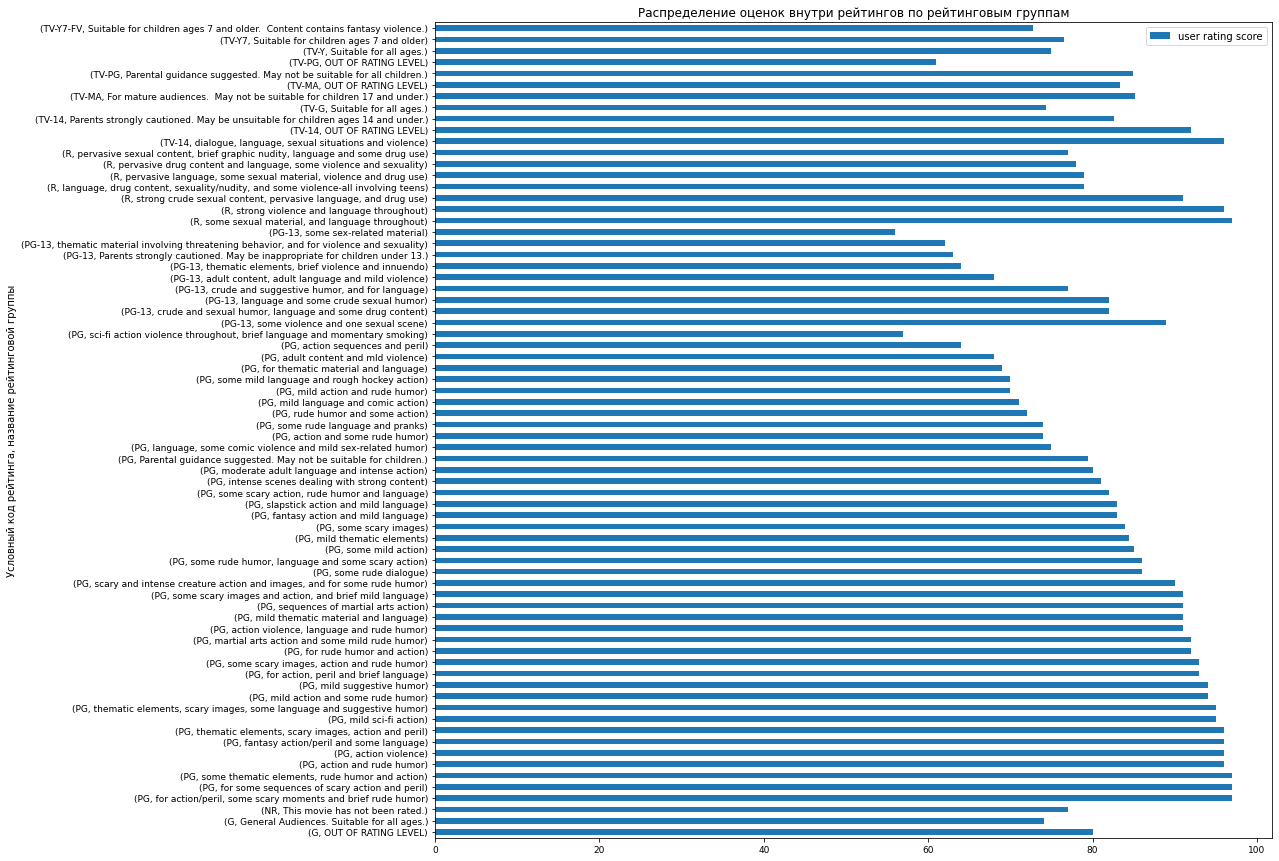

In [ ]:
data_pivot_table_rating_level_sorted.plot(xlabel = 'Условный код рейтинга, название рейтинговой группы',
                                          kind="barh", 
                                          fontsize=9, 
                                          figsize=(15,15),
                                          title ='Распределение оценок внутри рейтингов по рейтинговым группам')

Text(0.5, 1.0, 'Процентное соотношение рейтингов в Датасете')

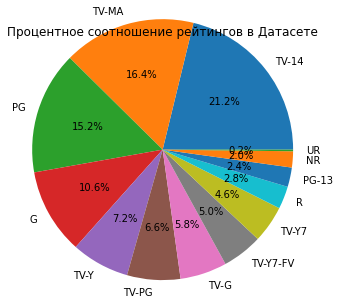

In [ ]:
plt.pie(data['rating'].value_counts(),
        labels=data['rating'].value_counts().index,
        autopct='%.1f%%',
        radius = 1.5)
plt.title( label = 'Процентное соотношение рейтингов в Датасете', loc = 'center')

### Выведите основную информацию об оценках пользователей
- Чему равны среднее, стандартное отклонение, минимум, максимум, медиана? 

**Ответ:**
    - mean      81.38
    - std       12.75
    - min       55.0
    - max       99.0
    - median    83.5
- Отличаются ли медиана и среднее?

**Ответ:**
Да, отличие есть. Медиана больше среднего примерно на 2 балла.

- Могут ли данные характеристики значительно отличаться? Почему?

**Ответ:**

Да, могут отличаться. Но здесь мы имеем дело с продуктом шоу-бизнеса. Обычно, перед выходом на экраны, все шоу проходят фокус-группы, затем, пилотные показы и так далее. Работают рекламные кампании. Проводятся опросы зрителей, собираются оценки пользователей он-лайн кинотеатров. На мой взгляд, в этом Датасете мы имеем дело либо с очищенной структурой данных от негативных оценок, либо действительно, у Netflix хорошо работает пост-продакшн.
Вообще, различия в данных бывают. Например, выбросы. В каком-то Датасете это будут ошибки, в каком-то поломки датчиков, в каком-то новые данные, которые изменились значительно (сейсмографы, например, стали регистрировать движение земной коры). Очень много зависит от характера собираемой информации.

In [ ]:
data_pivot_table.describe()
# Всего 256 оценок
# Средняя оценка 81.4 баллов
# Медианная оценка 83.5 баллов, половина оценок выше 83.5 баллов и до максимальной 99 баллов
# больше четверти категорий не имеет оценок пользователей
# четверть оценок находятся в пределах от 55 до 71 баллов.

,user rating score
count,256.000000
mean,81.398438
std,12.730904
min,55.000000
25%,71.000000
50%,83.500000
75%,93.000000
max,99.000000


### В какие годы были запущены шоу, представленные в датасете?

In [ ]:
# Посмотрим в какой год сколько было выпущено шоу
releases_per_year = data.groupby(by = 'release year', sort = True).size()
releases_per_year

release year
1940      1
1976      1
1978      1
1982      2
1986      1
1987      1
1989      2
1990      2
1991      1
1992      1
1993      5
1994      4
1995      2
1996      1
1997      9
1998      9
1999      5
2000      7
2001      6
2002      5
2003     11
2004      7
2005     10
2006     10
2007      8
2008     11
2009     10
2010     13
2011     15
2012     27
2013     33
2014     35
2015     61
2016    146
2017     37
dtype: int64

In [ ]:
# Посмотрим сколько оценок было поставлено в разрезе по годам. Какие минимальные, средние и максимальные значения представлены.
m = data.groupby(by = 'release year', sort = True).describe()
m

user rating score                                           \
                         count       mean        std   min    25%   50%   
release year                                                              
1940                       1.0  61.000000        NaN  61.0  61.00  61.0   
1976                       0.0        NaN        NaN   NaN    NaN   NaN   
1978                       1.0  86.000000        NaN  86.0  86.00  86.0   
1982                       1.0  68.000000        NaN  68.0  68.00  68.0   
1986                       1.0  67.000000        NaN  67.0  67.00  67.0   
1987                       1.0  58.000000        NaN  58.0  58.00  58.0   
1989                       1.0  80.000000        NaN  80.0  80.00  80.0   
1990                       1.0  65.000000        NaN  65.0  65.00  65.0   
1991                       0.0        NaN        NaN   NaN    NaN   NaN   
1992                       1.0  70.000000        NaN  70.0  70.00  70.0   
1993                       3.0  87.000000   7.937254  81.0  82.50  84.0   
1994                       4.0  80.000000  11.343133  70.0  70.75  78.5   
1995                       2.0  69.000000   7.071068  64.0  66.50  69.0   
1996                       0.0        NaN        NaN   NaN    NaN   NaN   
1997                       5.0  80.800000   8.136338  72.0  75.00  81.0   
1998                       5.0  79.000000   8.944272  64.0  80.00  81.0   
1999                       4.0  78.250000  13.351030  67.0  67.75  75.5   
2000                       4.0  85.000000   9.695360  74.0  78.50  85.5   
2001                       2.0  87.000000  12.727922  78.0  82.50  87.0   
2002                       2.0  90.500000   6.363961  86.0  88.25  90.5   
2003                       5.0  72.600000  16.425590  56.0  64.00  66.0   
2004                       3.0  83.000000   1.732051  82.0  82.00  82.0   
2005                       7.0  88.142857   4.634241  79.0  87.00  90.0   
2006                       7.0  69.285714  12.919163  55.0  60.50  64.0   
2007                       5.0  73.200000  13.479614  58.0  67.00  70.0   
2008                       6.0  79.833333  18.411047  56.0  64.75  88.5   
2009                       3.0  75.000000  19.519221  56.0  65.00  74.0   
2010                       6.0  78.333333  14.827902  55.0  73.25  77.5   
2011                       2.0  89.000000   1.414214  88.0  88.50  89.0   
2012                      16.0  79.437500  12.339469  59.0  67.50  85.0   
2013                      11.0  76.909091  14.720425  57.0  62.00  81.0   
2014                      12.0  74.916667  13.453342  57.0  63.00  74.0   
2015                      32.0  82.750000  11.919082  56.0  71.75  83.5   
2016                      86.0  84.313953  12.599030  56.0  77.00  89.0   
2017                      16.0  88.125000   8.585841  71.0  81.75  90.5   

                           
                75%   max  
release year               
1940          61.00  61.0  
1976            NaN   NaN  
1978          86.00  86.0  
1982          68.00  68.0  
1986          67.00  67.0  
1987          58.00  58.0  
1989          80.00  80.0  
1990          65.00  65.0  
1991            NaN   NaN  
1992          70.00  70.0  
1993          90.00  96.0  
1994          87.75  93.0  
1995          71.50  74.0  
1996            NaN   NaN  
1997          83.00  93.0  
1998          82.00  88.0  
1999          86.00  95.0  
2000          92.00  95.0  
2001          91.50  96.0  
2002          92.75  95.0  
2003          79.00  98.0  
2004          83.50  85.0  
2005          91.00  92.0  
2006          77.00  91.0  
2007          77.00  94.0  
2008          90.50  98.0  
2009          84.50  95.0  
2010          87.00  98.0  
2011          89.50  90.0  
2012          88.00  97.0  
2013          88.50  97.0  
2014          84.00  94.0  
2015          93.25  98.0  
2016          95.00  98.0  
2017          94.00  99.0

In [ ]:
# Оценки по каждому шоу по возрастанию года выпуска
data_pivot_table_title = data.pivot_table(index=['title', 'release year']).sort_values(['release year'], ascending=True)
data_pivot_table_title.head(50)

,,user rating score
title,release year,
Fantasia,1940,61.0
Grease,1978,86.0
Annie,1982,68.0
An American Tail,1986,67.0
Harry and the Hendersons,1987,58.0
"Honey, I Shrunk the Kids",1989,80.0
The Real Ghostbusters,1990,65.0
FernGully: The Last Rainforest,1992,70.0
Cool Runnings,1993,81.0


In [ ]:
# Так можно посмотреть каждый год на предмет того какие были выпущены шоу, какие оценки стоят, какой рейтинг и рейтинговая группа
data[data['release year'] == 1997]

,title,rating,ratingLevel,release year,user rating score
563,Ninja Turtles: The Next Mutation,TV-Y7-FV,Suitable for children ages 7 and older. Conte...,1997,NaN
601,Flubber,PG,slapstick action and mild language,1997,83.0
670,The Magic School Bus,TV-Y,Suitable for all ages.,1997,81.0
703,Anastasia,G,General Audiences. Suitable for all ages.,1997,93.0
708,Missione Hamburger,PG,"language, some comic violence and mild sex-rel...",1997,75.0
763,Pooh's Grand Adventure: The Search for Christo...,G,General Audiences. Suitable for all ages.,1997,NaN
769,The Brave Little Toaster to the Rescue,G,General Audiences. Suitable for all ages.,1997,NaN
784,Animaniacs,TV-Y7,Suitable for children ages 7 and older,1997,72.0
951,Mr. Magoo,PG,mild language and action sequences,1997,NaN


### Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. 

- Наблюдается ли рост? 

**Ответ:** Большой рост наблюдается с 2010 года
- Есть ли выбросы?

**Ответ:** да, к выбросам относятся шоу, вышедшие до 1997 года.

- Что из себя представляют выбросы?

**Ответ:** Это годы, в которых было мало выпущено шоу и которые имеют малое количество оценок.

- Чем могут быть они вызваны?

**Ответ:** Возможно, базы данных содержат мало релевантной информации, относительно шоу, вышедших ранее 1997 года. Возможно, он-лайн кинотеатры, в которых собраны оценки и коллекции шоу, по своим причинам не загружают в показ шоу до 1997 года, а те что есть - являются "культовыми" и их наличие в показах является "хорошим тоном". Все шоу, относящиеся к выбросам, являются культовыми классическими американскими фильмами и мультфильмами. Например:

**Fantasia** 1940 года - это культовый мультфильм о волшебных созданиях.

**The Smurfs** 1976 года - культовый мультфильм о маленьких синих троллях.

**Grease** 1978 год - культовый мюзикл о влюбленных подростках.

**Annie** 1982 год - культовый детский фильм о девочке, ищущей родителей.

**The Last Unicorn** 1982 год - культовый детский фильм о единороге, ищущем других единорогов.

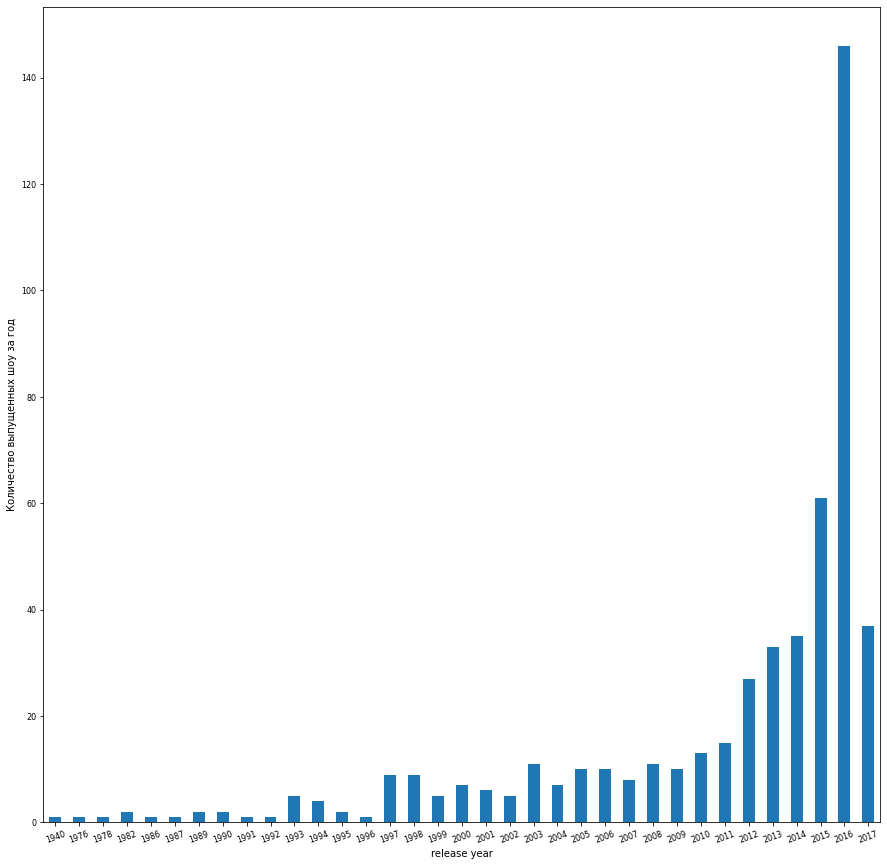

In [ ]:
releases_per_year.plot(kind="bar", fontsize=8, figsize=(15,15), rot=20, ylabel = 'Количество выпущенных шоу за год')

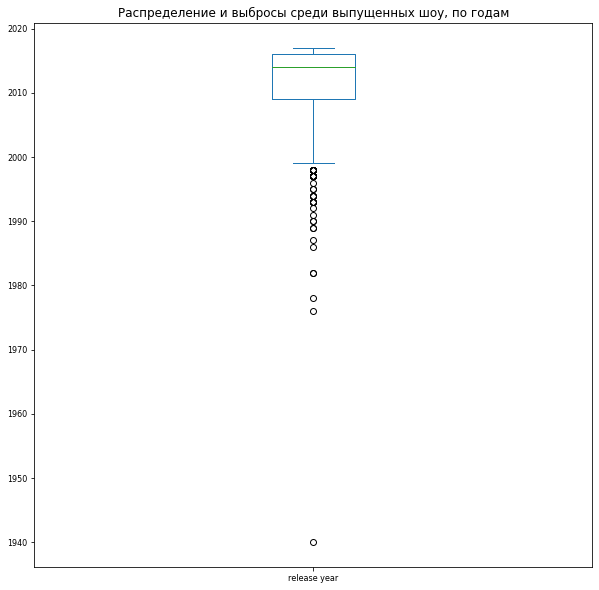

In [ ]:
data['release year'].plot(kind="box", fontsize=8, figsize=(10,10), title = 'Распределение и выбросы среди выпущенных шоу, по годам')

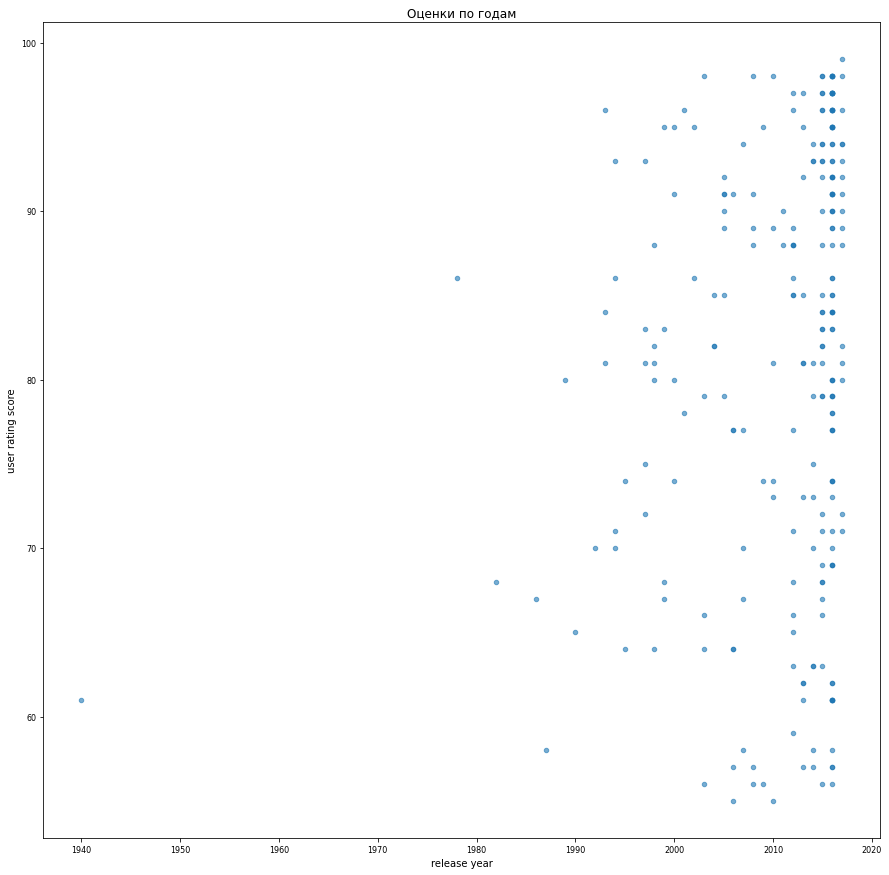

In [ ]:
data.plot.scatter(x="release year", y="user rating score", alpha=0.6, fontsize=8, figsize=(15,15), title = 'Оценки по годам')

### Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. 
- Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки)

**Ответ:**
Средняя оценка пользователей в 2016 году составила: **84.3**

Средняя оценка пользователей в 2017 году составила: **88.1**

Количество оценок **в 2017** году составило 16, всего шоу выпущено за 2017 год 37. Таким образом, **отношение выпущенных шоу и оценок составило 43%**

Количество оценок **в 2016** году составило 86, всего шоу выпущено за 2017 год 146. Таким образом, **отношение выпущенных шоу и оценок составило 59%**

Если ориентироваться на среднюю оценку как показатель успешности года по шоу, то в 2017 году оценки в среднем ставили выше, а значит год был успешнее.

Но при этом, стоит взять во внимание, что в 2016 году оценок ставили больше в процентном соотношении, чем в 2017 году. Что тоже можно трактовать как некоторая успешность для шоу.

- Как еще можно оценить "Успешность"? 

**Ответ:**

Можно посмотреть корреляции высоты оценок с количеством выпущенных шоу. На графике видно, что такая корреляция имеется.

In [ ]:
score_2016 = data[data['release year'] == 2016]['user rating score'].mean()
score_2017 = data[data['release year'] == 2017]['user rating score'].mean()
print(f'Средняя оценка пользователей в 2016 году составила: {score_2016}')
print(f'Средняя оценка пользователей в 2017 году составила: {score_2017}')
count2017 = data[data['release year'] == 2017]['user rating score'].count()
len2017 = len(data[data['release year'] == 2017])
print(f'Количество оценок в 2017 году составило {count2017}, всего шоу выпущено за 2017 год {len2017}. Таким образом, отношение выпущенных шоу и оценок составило {count2017/len2017*100:.0f}%')
count2016 = data[data['release year'] == 2016]['user rating score'].count()
len2016 = len(data[data['release year'] == 2016])
print(f'Количество оценок в 2016 году составило {count2016}, всего шоу выпущено за 2017 год {len2016}. Таким образом, отношение выпущенных шоу и оценок составило {count2016/len2016*100:.0f}%')

Средняя оценка пользователей в 2016 году составила: 84.31395348837209
Средняя оценка пользователей в 2017 году составила: 88.125
Количество оценок в 2017 году составило 16, всего шоу выпущено за 2017 год 37. Таким образом, отношение выпущенных шоу и оценок составило 43%
Количество оценок в 2016 году составило 86, всего шоу выпущено за 2017 год 146. Таким образом, отношение выпущенных шоу и оценок составило 59%


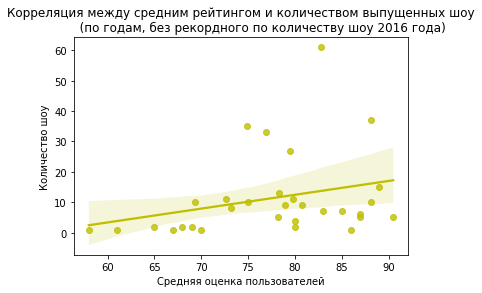

In [ ]:
sns.regplot(x=data[data['release year'] != 2016].groupby('release year')['user rating score'].mean(),
            y=data[data['release year'] != 2016].groupby('release year')['title'].count(),
            color='y')
plt.title('Корреляция между средним рейтингом и количеством выпущенных шоу\n \
          (по годам, без рекордного по количеству шоу 2016 года)')
plt.xlabel('Средняя оценка пользователей')
plt.ylabel('Количество шоу');

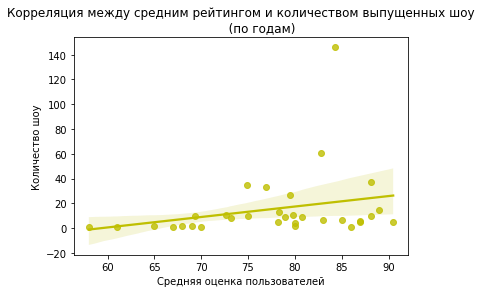

In [ ]:
sns.regplot(x=data.groupby('release year')['user rating score'].mean(),
            y=data.groupby('release year')['title'].count(),
            color='y')
plt.title('Корреляция между средним рейтингом и количеством выпущенных шоу\n \
          (по годам)')
plt.xlabel('Средняя оценка пользователей')
plt.ylabel('Количество шоу');

### Как нагляднее будет показать распределение пользователям по рейтинговым группам?

**Ответ:**
На мой взгляд, оба графика информативны, но нагляднее в данном случае круговая диаграмма. Прекрасно выделяются крупнейшие области, занимающие больше половины Датасета. Исходя из этих данных становится понятно, какие наиболее "излюбленные" рейтинги у Netflix.

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? ([Подсказка](https://sun9-40.userapi.com/c854228/v854228652/c754f/j6z5gMjJy2k.jpg))  
Постройте самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

![Charts](https://pp.userapi.com/c852024/v852024281/1a53b1/jSOsBIhxK3U.jpg)

Text(0.5, 1.0, 'Процентное соотношение рейтингов в Датасете')

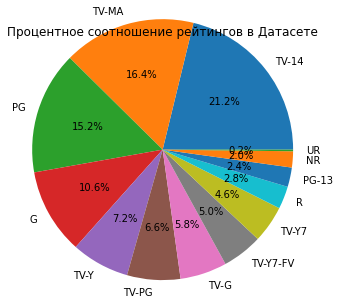

In [ ]:
plt.pie(data['rating'].value_counts(),
        labels=data['rating'].value_counts().index,
        autopct='%.1f%%',
        radius = 1.5)
plt.title( label = 'Процентное соотношение рейтингов в Датасете', loc = 'center')

### Теперь вам нужно выбрать любое из представленных шоу и при помощи изученных инструментов составить описательный портрет этого шоу :) 
Аналитики и Data Scientist-ы очень любят все сравнивать, поэтому при составлении описательного портрета рекомендуем вам сравнить выбранное шоу с другими по каким-либо характеристикам. Результаты не забудьте внести в презентацию. При возникновении трудностей обязательно пишите в чат, преподавателю или ассистентам.

**Ответ:**

Нашей группой было выбрано шоу **'Black Mirror'**.

Первые два сезона «Чёрного зеркала» были показаны на британском телеканале Channel 4 в декабре 2011 года и в феврале 2013 года соответственно. 16 декабря 2014 года вышла специальная рождественская серия. В **сентябре 2015** года права на телешоу приобрел американский стриминговый сервис **Netflix**, который заказал 12 эпизодов, впоследствии разделённых на третий и четвёртый сезоны, по 6 серий в каждом. **Третий сезон** был выпущен 21 октября **2016 года**, четвёртый — 29 декабря 2017 года. 28 декабря 2018 года на Netflix вышел полнометражный интерактивный фильм «Чёрное зеркало: Брандашмыг». Премьера пятого сезона «Чёрного зеркала», насчитывающего три эпизода, состоялась 5 июня 2019 года. 
В нашем Датасете указан год выпуска 2016, речь идет о третьем сезоне (он же первый для Netflix после покупки прав на сериал). Имеет рейтинг TV-MA и предназначен для взрослой аудитории. Зрители поставили среднюю оценку 80.0 баллов.

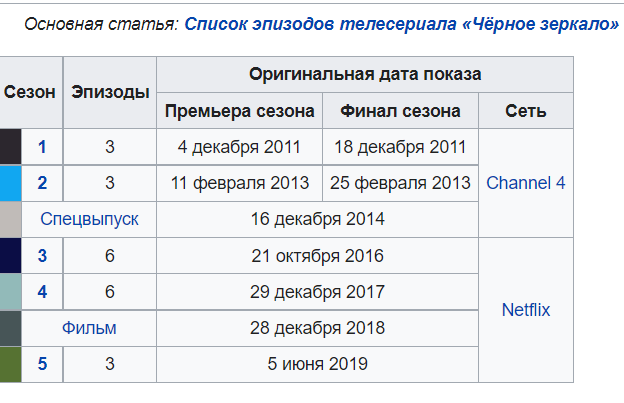

In [ ]:
# Количество серий в сезонах
series_BM = pd.DataFrame({'Первый': 3, 'Второй': 3, 'Третий': 6, 'Четвертый': 6, 'Пятый': 3},
                          index = range(1))
series_BM

,Первый,Второй,Третий,Четвертый,Пятый
0,3,3,6,6,3


In [ ]:
data[data['title'] == 'Black Mirror']

,title,rating,ratingLevel,release year,user rating score
17,Black Mirror,TV-MA,For mature audiences. May not be suitable for...,2016,80.0


In [ ]:
# По версии сайта Кинопоиск.ру (https://www.kinopoisk.ru/film/655800/reviews/?status=bad&ord=date&rnd=1673446425&perpage=200)
# этот сериал получил следующие оценки
scores_BM = pd.DataFrame({'Положительные': 126,
                          'Отрицательные': 20,
                          'Нейтральные': 16,
                          'Средний рейтинг': 82.7},
                         index = range(1))

In [ ]:
# Оставим для сравнения с данными Датасета
scores_BM

,Положительные,Отрицательные,Нейтральные,Средний рейтинг
0,126,20,16,82.7


In [ ]:
#выводим статистику по фильмам с рейтингом TV-MA
what_that=data.loc[data['rating'] == 'TV-MA']
what_that['user rating score'].describe()

count    40.000000
mean     84.825000
std      12.775954
min      56.000000
25%      80.000000
50%      89.000000
75%      95.000000
max      99.000000
Name: user rating score, dtype: float64

In [ ]:
# Количество штук по каждой оценке
graph1=what_that['user rating score'].dropna().value_counts().sort_index(ascending= True)
graph1

56.0    1
57.0    2
61.0    1
63.0    2
71.0    1
78.0    1
79.0    1
80.0    2
81.0    1
82.0    2
83.0    1
84.0    2
85.0    1
86.0    1
89.0    2
90.0    2
91.0    2
93.0    1
94.0    3
95.0    3
96.0    1
97.0    2
98.0    4
99.0    1
Name: user rating score, dtype: int64

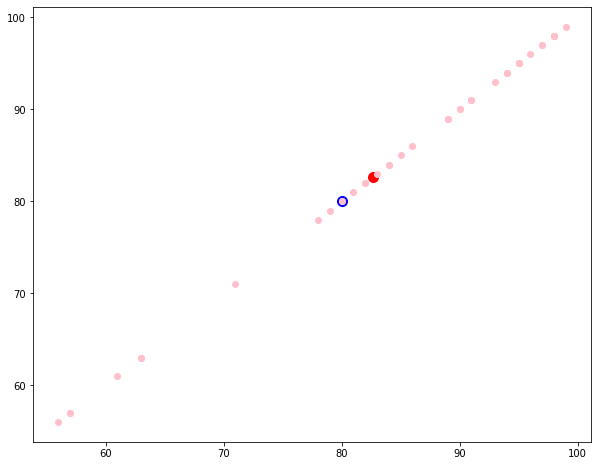

In [ ]:
fig1 = plt.figure(figsize=(10,8))
ax1 = fig1.add_subplot(111)
ax1.scatter(x = scores_BM['Средний рейтинг'], y  = scores_BM['Средний рейтинг'], s = 100, color = 'r')
ax1.scatter(x = data[data['title'] == 'Black Mirror']['user rating score'], y = data[data['title'] == 'Black Mirror']['user rating score'], s = 100, color = 'b' )
ax1.scatter(x = what_that['user rating score'], y = what_that['user rating score'], color = 'Pink')

Как можно заметить, российское сообщество оценило сериал чуть выше, чем зрители Датасета. Так же, из графика видно, что сериал не является самым успешным в своем рейтинге, а только открывает двадцатку лучших по оценкам зрителей. Он находится немного внутри второго квартиля, а значит, что основная часть шоу расположилась выше по оценкам зрителей. Среднее значение в этом рейтинге 84.83, что почти на 5 баллов выше, чем оценка сериала Black Mirror.

Text(0, 0.5, 'Серии, шт')

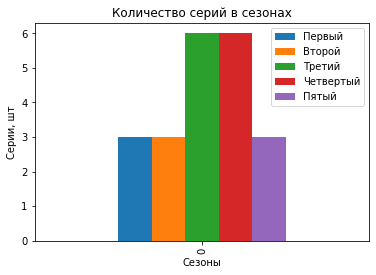

In [ ]:
series_BM.plot.bar(title = 'Количество серий в сезонах')
plt.xlabel('Сезоны')
plt.ylabel('Серии, шт')

Интересным можно отметить тот факт, что Netflix после покупки прав на сериал увеличил количество серий в сезонах сразу в два раза. Но из-за сравнительно небольших рейтингов последний сезон опять сократили до трез серий.
Несомненно, сериал Black Mirror имеет в мире огромную фанатскую группу. Серии не связаны друг с другом по смыслу, что позволяло держать зрителей в напряжении и ожидании новых серий.